# 1. Inspecting your data

If you want to solve a problem with machine learning, you'll need three things:

1. A good dataset;
2. A good model;
3. A good optimization algorithm.

If any of these three is not good enough, your trained model won't be good either. Many novice machine learning practitioners mainly focus on the second requirement, i.e., the model. While a good model certainly is a vital aspect of a succesful machine learning pipeline, if your data sucks, it doesn't really matter how advanced your model is. **The model can only be as good as the data.** If you are smart, but the course books you learn from are total chaos, you'll still have a very difficult time learning from them.

Therefore, your first step in a machine learning project should always be to **inspect your data**. And that's exactly what we'll do now!

## 1.1 Inspecting the filetree

Before you can start inspecting the data itself, you need to know how and where your data is stored.

For this example, download the [Gen 1 Pokemon Dataset from Kaggle](https://www.kaggle.com/datasets/echometerhhwl/pokemon-gen-1-38914), extract it and move it to the parent directory of this notebook. Rename the folder from `archive` to `PokemonGen1`.

We'll now inspect what's inside the `PokemonGen1` directory. For this, you can use the [`pathlib`](https://docs.python.org/3/library/pathlib.html) module from the Python standard library. A [`pathlib.Path`](https://docs.python.org/3/library/pathlib.html#pathlib.Path) object is an abstract representation of a path (e.g., to a file or directory) in you operating system.

Let's create a `Path` object for the `PokemonGen1` directory.

In [1]:
from pathlib import Path

data_path = Path('./PokemonGen1')

To inspect the files in the directory, we can employ the [`glob()` method of the `Path` class](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob). This method expects a *pattern* and returns all paths that match the given pattern. In this pattern, an asterisk (`*`) is interpreted as a wildcard. So, to list all files in the `PokemonGen1` directory, we can pass in the pattern `*`:

In [2]:
data_path.glob('*')

<generator object Path.glob at 0x7f8a17635e00>

This will give you something like `<generator object Path.glob at 0x............>`. Indeed, the `glob()` method returns a Python [generator](https://wiki.python.org/moin/Generators), not a list. A generator is an object you can iterate over (just like a list) but that (unlike a list) cannot be indexed. A generator can only tell you the *next* item.

> The advantage of generators is that they don't need to store all iteration items up-front. If the iteration items are large, or if there is a large number of items, a generator can save large amounts of memory.

To see the items in a generator, we can use a simple `for` loop:

In [3]:
for p in data_path.glob('*'):
    print(p)

PokemonGen1/data


We can also convert a generator into a list by passing the generator to the [built-in function](https://docs.python.org/3/library/functions.html) [`list()`](https://docs.python.org/3/library/functions.html#func-list)...

In [4]:
list(data_path.glob('*'))

[PosixPath('PokemonGen1/data')]

...or by employing a [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp):

In [5]:
[p for p in data_path.glob('*')]

[PosixPath('PokemonGen1/data')]

As we saw from the previous cells, the `PokemonGen1` directory only contains a single directory, i.e., `PokemonGen1/data`. Let's inspect this directory as well:

In [6]:
list(data_path.glob('data/*'))

[PosixPath('PokemonGen1/data/Exeggcute'),
 PosixPath('PokemonGen1/data/Growlithe'),
 PosixPath('PokemonGen1/data/Lickitung'),
 PosixPath('PokemonGen1/data/Rhydon'),
 PosixPath('PokemonGen1/data/Machop'),
 PosixPath('PokemonGen1/data/Haunter'),
 PosixPath('PokemonGen1/data/Pidgey'),
 PosixPath('PokemonGen1/data/Weepinbell'),
 PosixPath('PokemonGen1/data/Spearow'),
 PosixPath('PokemonGen1/data/Vileplume'),
 PosixPath('PokemonGen1/data/Venonat'),
 PosixPath('PokemonGen1/data/Kabuto'),
 PosixPath('PokemonGen1/data/Poliwrath'),
 PosixPath('PokemonGen1/data/MrMime'),
 PosixPath('PokemonGen1/data/Omanyte'),
 PosixPath('PokemonGen1/data/Clefairy'),
 PosixPath('PokemonGen1/data/Tangela'),
 PosixPath('PokemonGen1/data/Aerodactyl'),
 PosixPath('PokemonGen1/data/Parasect'),
 PosixPath('PokemonGen1/data/Wartortle'),
 PosixPath('PokemonGen1/data/Graveler'),
 PosixPath('PokemonGen1/data/Dratini'),
 PosixPath('PokemonGen1/data/Kingler'),
 PosixPath('PokemonGen1/data/Kakuna'),
 PosixPath('PokemonGen1/d

We can see that `PokemonGen1/data` contains a large number of subdirectories that correspond to different Pokémon names. How many Pokémon does our dataset contain?

In [7]:
len(list(data_path.glob('data/*')))

149

We can inspect the total number of files that is in one of the subdirectories

In [8]:
len(list(data_path.glob('data/*/*')))

35626

We can also inspect the file extensions of all these files:

In [9]:
exts = set()

for p in data_path.glob('data/*/*'):
    exts.add(p.suffix)

exts

{'.jpg', '.png'}

Or, with a set comprehension:

In [10]:
{p.suffix for p in data_path.glob('data/*/*')}

{'.jpg', '.png'}

From the above cells, we know that the subdirectories contain files with `.jpg` and `.png` extensions. In other words, when globbing the `PokemonGen1/data` directory, we'll get **35 626 images**.

## 1.2 Representing the dataset as a `DataFrame`

We're starting to get a feeling of how the files in the dataset are structured. The folder `PokemonGen1` contains a subdirectory `data`, and this directory contains multiple subdirectories, each of which corresponds to a Pokémon. The Pokémon directories contain files that have either a `.jpg` or a `.png` extension (i.e., images).

With `pathlib`'s `glob()`, we can explore our dataset in a rudimentary way. To understand our data more deeply, we can represent our dataset as a [`DataFrame` object from the `pandas` library](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). A DataFrame is a tabular data structure consisting of rows and columns, much like an Excel sheet.

We want to create a DataFrame that contains two columns: `image` and `label`. The `image` column contains the path to an image of a Pokémon, and the `label` column contains the corresponding name of that Pokémon.

In [11]:
import pandas as pd

rows = []

for img_path in data_path.glob('data/*/*'):
    rows.append({
        'image': str(img_path),
        'label': img_path.parent.name
    })

df = pd.DataFrame(rows)

In [12]:
df

,image,label
0,PokemonGen1/data/Exeggcute/3653b2a71e8c807f2f3...,Exeggcute
1,PokemonGen1/data/Exeggcute/f5ded85237df771e75a...,Exeggcute
2,PokemonGen1/data/Exeggcute/590828b3194f14e1683...,Exeggcute
3,PokemonGen1/data/Exeggcute/8f9aecc82959efb76bf...,Exeggcute
4,PokemonGen1/data/Exeggcute/4c060c08e8c028ecdd6...,Exeggcute
...,...,...
35621,PokemonGen1/data/Oddish/b4e732892527d9821e42c5...,Oddish
35622,PokemonGen1/data/Oddish/50db809935d7a1ede005ed...,Oddish
35623,PokemonGen1/data/Oddish/5accb3fec4123f34a60b1f...,Oddish
35624,PokemonGen1/data/Oddish/95c25b1af645f93d98605e...,Oddish


Of course, you can also create the same DataFrame with a list comprehension:

In [13]:
df = pd.DataFrame([
    {
        'image': str(img_path),
        'label': img_path.parent.name
    }
    for img_path in data_path.glob('data/*/*')
])

## 1.3 Inspecting images and labels

We already know some interesting properties of our dataset, but we haven't seen any images, yet! Let's visualize the first image in our dataset.

To obtain the elements of a column in a DataFrame, you can pass in the column name between square brackets.

In [14]:
df['image']

0        PokemonGen1/data/Exeggcute/3653b2a71e8c807f2f3...
1        PokemonGen1/data/Exeggcute/f5ded85237df771e75a...
2        PokemonGen1/data/Exeggcute/590828b3194f14e1683...
3        PokemonGen1/data/Exeggcute/8f9aecc82959efb76bf...
4        PokemonGen1/data/Exeggcute/4c060c08e8c028ecdd6...
                               ...                        
35621    PokemonGen1/data/Oddish/b4e732892527d9821e42c5...
35622    PokemonGen1/data/Oddish/50db809935d7a1ede005ed...
35623    PokemonGen1/data/Oddish/5accb3fec4123f34a60b1f...
35624    PokemonGen1/data/Oddish/95c25b1af645f93d98605e...
35625    PokemonGen1/data/Oddish/6bf2bcf5152a745621e7e1...
Name: image, Length: 35626, dtype: object

The returned object is a pandas [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) object. This is somewhat comparable to a list. To get the value of the `image` column at row `0`, you can index with `[0]`.

In [15]:
df['image'][0]

'PokemonGen1/data/Exeggcute/3653b2a71e8c807f2f345cadc1c87cae.jpg'

Now, we can use [Pillow](https://pillow.readthedocs.io/en/stable/) to visualize the image.

In [16]:
from PIL import Image


img_path = df['image'][0]
im = Image.open(img_path)

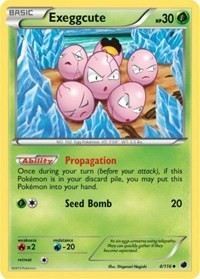

In [17]:
im

Instead of viewing images one by one, we can save some time by visualizing a **grid** of images. To get the first 10 image paths in the DataFrame, we can run the following:

In [18]:
df['image'][:10]

0    PokemonGen1/data/Exeggcute/3653b2a71e8c807f2f3...
1    PokemonGen1/data/Exeggcute/f5ded85237df771e75a...
2    PokemonGen1/data/Exeggcute/590828b3194f14e1683...
3    PokemonGen1/data/Exeggcute/8f9aecc82959efb76bf...
4    PokemonGen1/data/Exeggcute/4c060c08e8c028ecdd6...
5    PokemonGen1/data/Exeggcute/df7f7291d4b3a322731...
6    PokemonGen1/data/Exeggcute/64bef9a15674997f539...
7    PokemonGen1/data/Exeggcute/f27718ff620082abbbd...
8    PokemonGen1/data/Exeggcute/77a01a6b062369e68e2...
9    PokemonGen1/data/Exeggcute/6798e834f1e2e23ff5b...
Name: image, dtype: object

To visualize the image paths in this `Series` object, we 

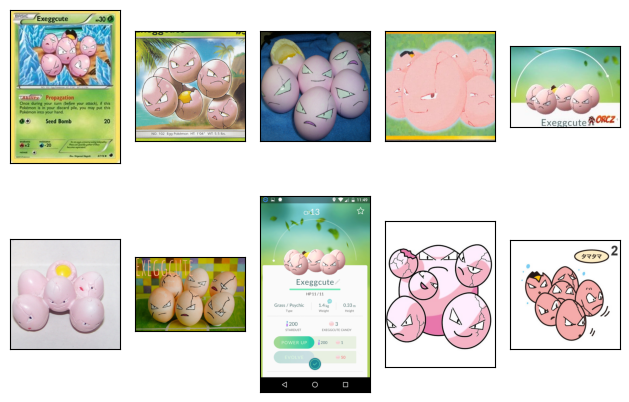

In [19]:
from matplotlib import pyplot as plt
import numpy as np


imgs = df['image'][:10]

fig, axes = plt.subplots(ncols=5, nrows=2)

for ax, img in zip(axes.flatten(), imgs):
    im = Image.open(img)
    ax.imshow(im)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

fig.tight_layout()

We can also draw random samples from our DataFrame:

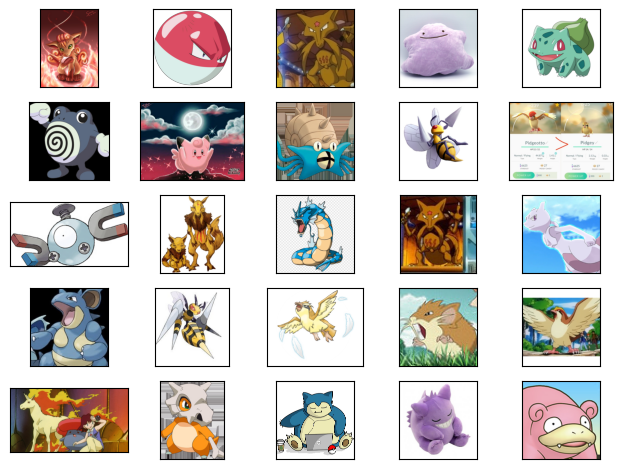

In [20]:
imgs = df['image'].sample(25)

fig, axes = plt.subplots(ncols=5, nrows=5)

for ax, img in zip(axes.flatten(), imgs):
    im = Image.open(img)
    ax.imshow(im)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

fig.tight_layout()

To make it more insightful, we can put the corresponding label on top of each image:

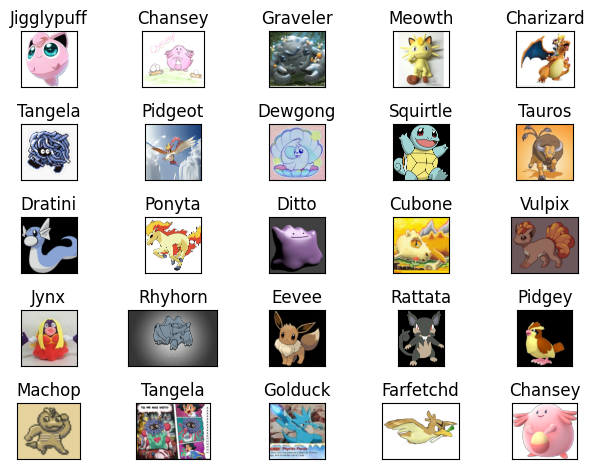

In [21]:
df_sample = df.sample(25)

fig, axes = plt.subplots(ncols=5, nrows=5)

for ax, (_, row) in zip(axes.flatten(), df_sample.iterrows()):
    img = row['image']
    label = row['label']

    im = Image.open(img)
    ax.imshow(im)
    ax.set_title(label)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

fig.tight_layout()

Another interesting inspection is to visualize some random images of a **particular label**. To get all rows that belong to a certain label, you can use the following code:

In [22]:
df[df['label'] == 'Charmander']

,image,label
8269,PokemonGen1/data/Charmander/0a1605d22f392a6c45...,Charmander
8270,PokemonGen1/data/Charmander/f663cdaeac24a5f176...,Charmander
8271,PokemonGen1/data/Charmander/a910be20223a081818...,Charmander
8272,PokemonGen1/data/Charmander/f71aa4e68e1ef9db65...,Charmander
8273,PokemonGen1/data/Charmander/885adceaa1ff11bfe9...,Charmander
...,...,...
8749,PokemonGen1/data/Charmander/763f90720a2a610d4e...,Charmander
8750,PokemonGen1/data/Charmander/8867015968a3401743...,Charmander
8751,PokemonGen1/data/Charmander/9d46af01b1bb0acaf5...,Charmander
8752,PokemonGen1/data/Charmander/df5cd872aed542c8f7...,Charmander


Now, we can just sample from this and run the same code as before.

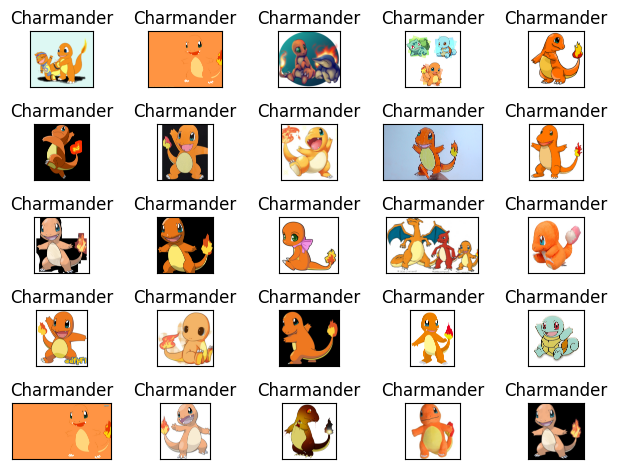

In [23]:
df_sample = df[df['label'] == 'Charmander'].sample(25)

fig, axes = plt.subplots(ncols=5, nrows=5)

for ax, (_, row) in zip(axes.flatten(), df_sample.iterrows()):
    img = row['image']
    label = row['label']

    im = Image.open(img)
    ax.imshow(im)
    ax.set_title(label)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)

fig.tight_layout()

## 1.3 Visualizing data imbalance


Ideally, the training images of a certain Pokémon are representative for the true distribution of the appearance of that Pokémon. For example, if a Pokémon can occur at multiple poses, images of the Pokémon in these poses should be included in the dataset. When a class has very few images, it is unlikely that the dataset truly captures this appearance distribution, and thus our model is less likely to generalize to unseen examples of that class.

You can use matplotlib to visualize the number of images per class.

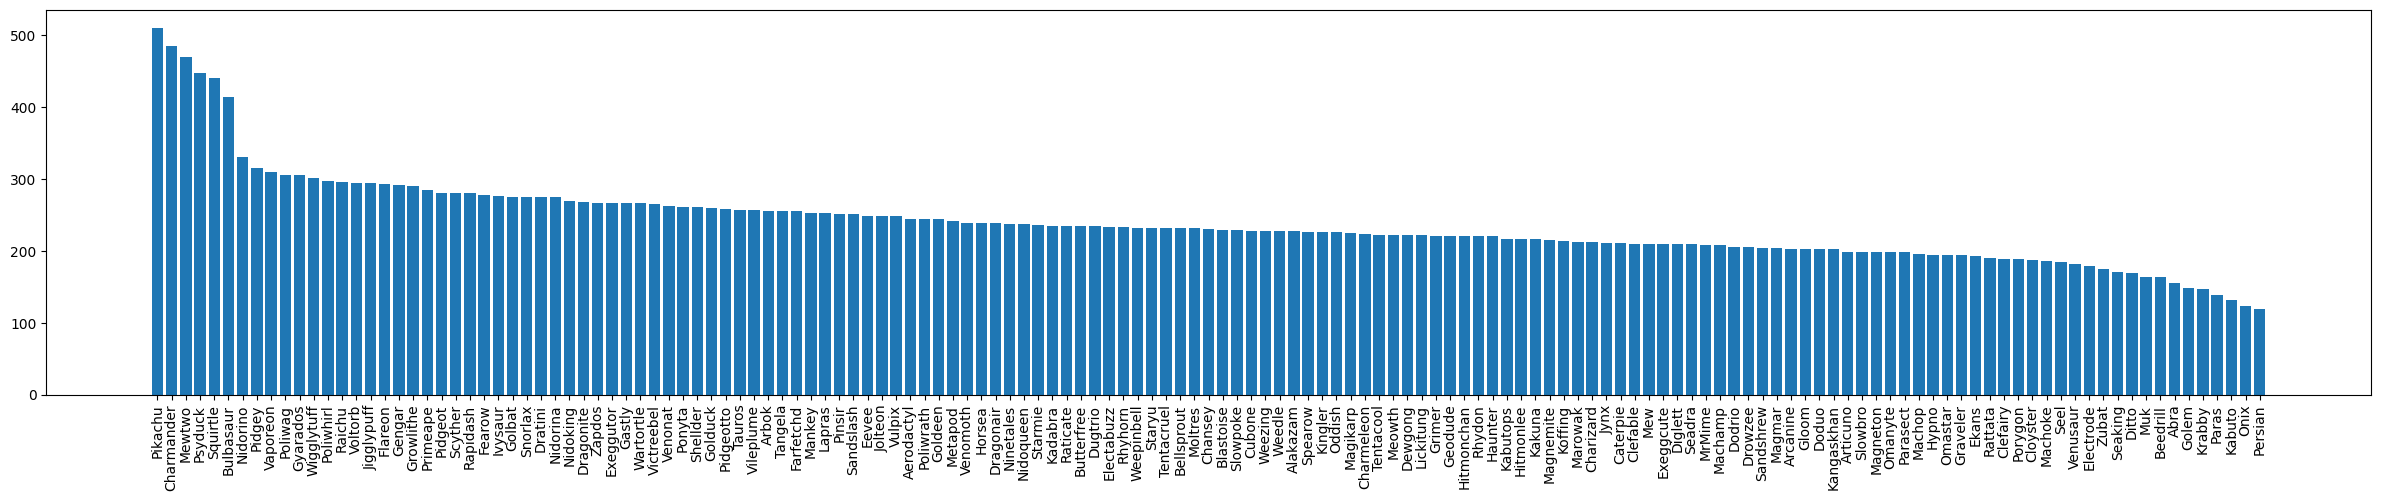

In [24]:
fig, ax = plt.subplots(figsize=(30, 5))

count_per_label = df.groupby('label').apply(len).sort_values(ascending=False)

ax.bar(count_per_label.index, count_per_label.values)
ax.tick_params(axis='x', labelrotation=90)

Now, you should be careful drawing too many conclusions from this graph alone! It is not necessarily true that classes with less samples will generalize worse than classes with more samples. If the images are very redundant (or contain label noise), for example, a large class might be represented worse than a small class.

## 1.4 Inspecting data transforms

When visualizing the images in the dataset, you might have noticed that the images have all kinds of sizes. When training a neural network, we'll want to create *batches* of images. Such a batch can only be created from images of the **same size**. Before we can start training, thus, we'll need a way to give each image the same size.